### The Curse of Dimensionality

In [1]:
###### Define Numerical Python environment

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
###### Define `datasets` of varying size using `make_classification`

from sklearn.datasets import make_classification

n_vals = np.logspace(1, 4, 20)

datasets = { 
    int(n): make_classification(int(n)) 
    for n in n_vals
}

In [3]:
###### Load models from Scikit-Learn

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [4]:
###### Define dictionary of models

models = {
    'knn' : KNeighborsClassifier(),
    'lr' : LogisticRegression(),
    'dt' : DecisionTreeClassifier(),
    'svm' : SVC(),
}

In [5]:
###### import `time` library

from time import time

In [6]:
###### Define functions to time fit and prediction

def time_fit(data, model):
    start = time()
    model.fit(*data)
    fit_time = time() - start
    return fit_time

def time_predict(data, model):
    start = time()
    model.predict(data[0])
    predict_time = time() - start
    return predict_time

In [7]:
###### Define function to test all models on a dataset of size $n$

def fit_predict_model_on_n(model_name, n):
    
    model = models[model_name]
    dataset = datasets[n]
    
    fit_time = time_fit(dataset, model)
    
    predict_time = time_predict(dataset, model)
    
    return {
        'model_name' : model_name,
        'n' : n,
        'fit_time' : fit_time,
        'predict_time' : predict_time
    }

In [8]:
###### Run all models against all datasets 

results = []
for n in datasets.keys():
    for model in models.keys():
        results.append(fit_predict_model_on_n(model, n))

In [9]:
###### Collect results in a `DataFrame`

results_df = pd.DataFrame(results)

In [10]:
###### Display a sample of the results

results_df.sample(5)

,fit_time,model_name,n,predict_time
49,0.001512,lr,784,0.000087
61,0.003356,lr,2335,0.000208
41,0.001146,lr,379,0.000084
45,0.001624,lr,545,0.001891
16,0.000275,knn,42,0.000526


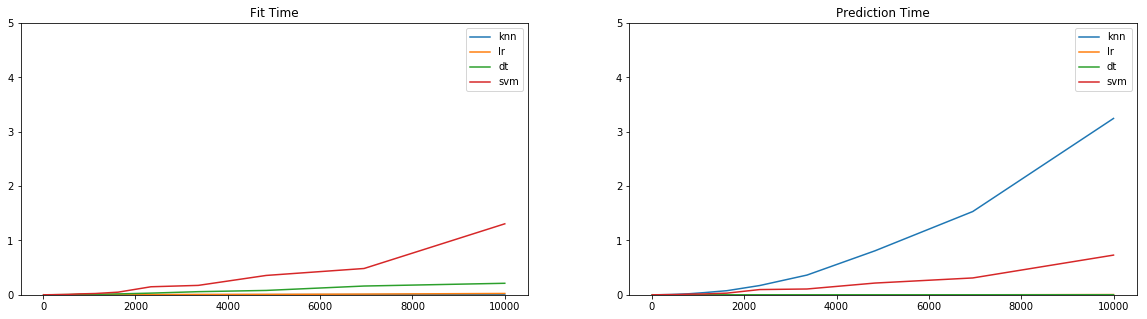

In [11]:
###### Plot Fit Time and Prediction Time

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,5))

for model_name in results_df.model_name.unique():
    
    model_mask = (results_df.model_name == model_name)
    model_results_df = results_df[model_mask]

    ax1.set_title('Fit Time')
    ax1.plot(model_results_df.n, 
             model_results_df.fit_time, 
             label=model_name)
    ax1.set_ylim((0,5))
    ax1.legend()
    
    ax2.set_title('Prediction Time')
    ax2.set_ylim((0, 5))
    ax2.plot(model_results_df.n, 
             model_results_df.predict_time, 
             label=model_name)
    ax2.legend()
    
plt.show()    

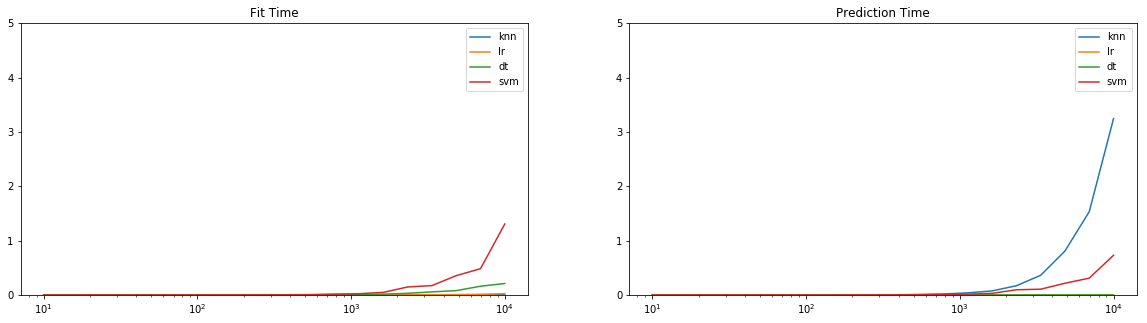

In [12]:
###### Plot Fit Time and Prediction Time with Logarithmic Scale for $n$

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,5))

for model_name in results_df.model_name.unique():
    
    model_mask = (results_df.model_name == model_name)
    model_results_df = results_df[model_mask]
    
    ax1.set_title('Fit Time')
    ax1.plot(model_results_df.n, 
             model_results_df.fit_time, 
             label=model_name)
    ax1.set_xscale('log')
    ax1.set_ylim((0, 5))
    ax1.legend()
    
    ax2.set_title('Prediction Time')
    ax2.plot(model_results_df.n, 
             model_results_df.predict_time, 
             label=model_name)
    ax2.set_xscale('log')
    ax2.set_ylim((0, 5))
    ax2.legend()

plt.show()    